# Introduction

As we were deciding upon which metric to use in determining the best neighborhood in Pittsburgh, our group first found a dataset containing air quality indexes throughout Allegheny County. From there, we considered environmental friendliness as a metric. However, as we searched for more datasets, we found some relating to affordances of parks throughout Allegheny County. We then decided to consider the affordances of outdoor recreational activities in each neighborhood as our metric. 

Although environmental friendliness and sustainability is an important metric, a neighborhood's appeal extends beyond environmental considerations to include the quality of life that it offers. The availability of high quality parks, trails, and open spaces greatly adds to the appeal of a neighborhood and the quality of life of those living there. So, for our project we decided to consider the affordances of outdoor recreational activities in each neighborhood.

**THE METRIC**

Our metric, Outdoor Recreational Affordance, represents a holistic evaluation of a neighborhood's ability to provide outdoor recreational experiences for its residents. To formulate this metric, we evaluated three primary datasets: Allegheny County Trail Locations, Allegheny County Park Features, and City of Pittsburgh Pools.

The Allegheny Count Trails Locations dataset will be used to measure trail mileage, with greater mileage being defined as better. The Allegheny County Park Features dataset will be used to measure park capacity by taking the sum of capacities of each feature the park has. The City of Pittsburgh Pools dataset is used as an initial filter to narrow down the amount of parks to compare. The neighborhoods will be ranked on pool water capacity.

---
# The Best Neighborhood

Talking about the best neighborhood and the data that shows this.

***TODO: Give points to each neighborhood and see which neighborhood wins and talk about it here.***

---

**Park Totals**

1. North Park - 81.3
2. Hartwood Acres - 65.5
3. South Park - 37.7
4. White Oak Park - 32.9
5. Boyce Park - 28.7
6. Deer Lakes Park - 22.5
7. Harrison Hills Park - 22.3
8. Settler's Cabin Park - 20.6
9. Round Hill Park - 4.3

For our final calculation, we will only be considering the top 5 park scores.

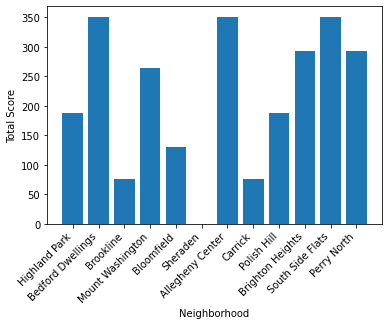

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("park_distances.csv")
park_scores = {'North Park': 81.3, 'Hartwood Acres': 65.5, 'South Park': 37.7, 'White Oak Park': 32.9, 'Boyce Park': 28.7}

for index, row in df.iterrows():
    for park, value in park_scores.items():
        if row[park] <= 25:
            result_df.at[index, 'Neighborhood_Total'] += value
            
plt.bar(result_df['Neighborhood'], result_df['Neighborhood_Total'])
plt.xlabel('Neighborhood')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.show()